In [1]:
# Checks for the operating system that the script is being run on determines the data path that is to be used
import platform
operating_system=platform.system()
if operating_system=='Windows':
    data_directory=("D:\KSP\Study\Houston\Projects\TSLO Experiments\TSLO_core\External display\Results\S01\PilotData")
elif operating_system=='Linux':
    data_directory=('/mnt/Elements/ao/CrowdingVids_Data/')



In [2]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import pylab
from scipy.optimize import curve_fit
from numpy import genfromtxt


os.chdir(data_directory)


Populating the interactive namespace from numpy and matplotlib


In [6]:
filedir_list=[]
for root,dirs,file in os.walk(data_directory):
    filedir_list.append(root)

/mnt/Elements/ao/CrowdingVids_Data/
/mnt/Elements/ao/CrowdingVids_Data/AO001R
/mnt/Elements/ao/CrowdingVids_Data/AO001R/12_19_2018_16_42_48
/mnt/Elements/ao/CrowdingVids_Data/AO001R/12_19_2018_16_46_48
/mnt/Elements/ao/CrowdingVids_Data/AO001R/12_19_2018_16_49_55
/mnt/Elements/ao/CrowdingVids_Data/AO001R/12_19_2018_16_51_28
/mnt/Elements/ao/CrowdingVids_Data/AO001R/12_19_2018_16_52_43
/mnt/Elements/ao/CrowdingVids_Data/AO001R/12_19_2018_16_54_11
/mnt/Elements/ao/CrowdingVids_Data/AO001R/12_19_2018_16_56_16
/mnt/Elements/ao/CrowdingVids_Data/AO001R/12_19_2018_16_58_9
/mnt/Elements/ao/CrowdingVids_Data/AO001R/12_19_2018_16_5_7
/mnt/Elements/ao/CrowdingVids_Data/AO001R/12_19_2018_16_6_55
/mnt/Elements/ao/CrowdingVids_Data/AO001R/12_19_2018_16_8_14
/mnt/Elements/ao/CrowdingVids_Data/AO001R/12_19_2018_17_0_49
/mnt/Elements/ao/CrowdingVids_Data/AO001R/12_19_2018_17_2_15
/mnt/Elements/ao/CrowdingVids_Data/AO001R/12_19_2018_17_3_27
/mnt/Elements/ao/CrowdingVids_Data/AO001R/12_19_2018_17_4_50
/

In [31]:
%time
     
AOdataframe=pd.DataFrame({'root':[],'fileID':[],'time':[],'xPos':[],'yPos':[]})
for path in filedir_list:
    for filename in os.listdir(path):
        if filename.endswith('.csv'):
            print(filename)
            PDArray=[]
            AOData=[]
            filepath=path+'/'+filename
            PDArray=pd.read_csv(filepath,error_bad_lines=False)
            AOData=np.array(PDArray)
            trimmedAOData=AOData[:,5:69] #this way we discard the empty columns and get 64 columns of x & y pos
            dataShape=np.shape(trimmedAOData)
            xPos=[]
            yPos=[]
            for rowIdx in range(dataShape[0]):
                for columnIdx in range(dataShape[1]):
                    if columnIdx%2==1: # odd index
                        xPos.append(trimmedAOData[rowIdx,columnIdx])
                    elif columnIdx%2==0: # even Idx
                        yPos.append(trimmedAOData[rowIdx,columnIdx])

            timeaxisLower=0
            timeaxisUpper=dataShape[0]/30
            numTimeSamples=len(xPos)
            timeaxis_secs=np.linspace(0,timeaxisUpper,numTimeSamples)

            AOdataframe=AOdataframe.append({'root':path,'fileID':filename[:-4],'time':timeaxis_secs,'xPos':xPos,'yPos':yPos},ignore_index=True)


CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 4.29 µs
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_006.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv


b'Skipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 

AO001R_004.csv
AO001R_005.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv


b'Skipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\n'
b'Skipping line 4: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping lin

AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv


b'Skipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line

AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv


b'Skipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping lin

AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv


b'Skipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\n'
b'Skipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 1

AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv


b'Skipping line 8: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\n'
b'Skipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping l

AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009

b'Skipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkippin

AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv


b'Skipping line 4: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\n'
b'Skipping line 4: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\n'
b'Skipping line 7: expected 69 fields, saw 102\nSkipping l

AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv


b'Skipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 

AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv


b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: exp

AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014

b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 2

AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv


b'Skipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line

AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008

b'Skipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 3

AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv


b'Skipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25:

AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030

b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: 

AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015

b'Skipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\n'
b'Skipping 

AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv


b'Skipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\n'
b'Skipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\n'
b'Skipping line 13: expected 69 fields, saw 102\nSkipping l

AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv


b'Skipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\n'
b'Skipping lin

AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv


b'Skipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping lin

AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv


b'Skipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\n'
b'Skipping line 4: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 1

AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv


b'Skipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\n'
b'Skipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkippin

AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv


b'Skipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping li

AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv


b'Skipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\n'
b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 

AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv


b'Skipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\n'
b'Skipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping 

AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv


b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: 

AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_006.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008

b'Skipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26

AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv


b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: 

AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv


b'Skipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\n'
b'Skipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping li

AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030

b'Skipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\n'
b'Skipping line 4: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 1

AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv


b'Skipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping li

AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv


b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 6: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping lin

AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv


b'Skipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 28: expected 69 fields, saw 102\nSkipping l

AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv


b'Skipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping li

AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv


b'Skipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\n'
b'Skipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping li

AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv


b'Skipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\n'
b'Skipping line 6: expected 69 fields, saw 102\nSkipping li

AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv


b'Skipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25:

AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010

b'Skipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\n'
b'Skipping l

AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv


b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: 

AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv


b'Skipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping lin

AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024

b'Skipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line

AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv


b'Skipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\n'
b'Skipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line

AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv


b'Skipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17:

AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005

b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 26: 

AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv


b'Skipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\n'
b'Skipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 

AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv


b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: 

AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv


b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30

AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv


b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: 

AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv


b'Skipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 

AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv


b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\n'
b'Skipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13

AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_V006.csv
AO001R_V001.csv
AO001R_V002.csv
AO001R_V003.csv


b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: 

AO001R_V004.csv
AO001R_V005.csv
AO001R_V007.csv
AO001R_V008.csv
AO001R_V009.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv


b'Skipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping li

AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_018.csv
AO001R_006.csv
AO001R_024.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_023.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
_V001.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv


b'Skipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 2

AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016

b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 

AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv


b'Skipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\n'
b'Skipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 1

AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv


b'Skipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\n'
b'Skipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\n'
b'Skipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 1

AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv


b'Skipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\n'
b'Skipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 

AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv


b'Skipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\n'
b'Skipping line 5: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping

AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv


b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: e

AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv


b'Skipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\n'
b'Skipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16

AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011

b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line

AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv


b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26

AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002

b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 

AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016

b'Skipping line 5: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line

AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010

b'Skipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping l

AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv


b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: 

AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029

b'Skipping line 13: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 13: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkippin

AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv


b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26

AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv


b'Skipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 21: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkippin

AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv


b'Skipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping

AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv


b'Skipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\n'
b'Skipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\n'
b'Skipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping 

AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030

b'Skipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29

AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv


b'Skipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping lin

AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv


b'Skipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25:

AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv


b'Skipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: ex

AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020

b'Skipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping li

AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv


b'Skipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\n'
b'Skipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping

AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030

b'Skipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28

AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv


b'Skipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\n'
b'Skipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping 

AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv


b'Skipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\n'
b'Skipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 7: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping

AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv


b'Skipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\n'
b'Skipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping

AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028

b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\n'
b'Skipping line 3: expected 69 fields, saw 102\nSkipping li

AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv


b'Skipping line 4: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\n'
b'Skipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line

AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv


b'Skipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\n'
b'Skipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping 

AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv


b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: 

AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv


b'Skipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 

AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027

b'Skipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 30: expected 69 fields, saw 102\nSkipping lin

AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv


b'Skipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\n'
b'Skipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\n'
b'Skipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkip

AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv


b'Skipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 85\n'
b'Skipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 7: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\n'
b'Skipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkippin

AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv


b'Skipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\n'
b'Skipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSki

AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv


b'Skipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipp

AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv


b'Skipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26

AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv


b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping li

AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv


b'Skipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25:

AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv


b'Skipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\n'
b'Skipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skippi

AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv


b'Skipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 2

AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv


b'Skipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping lin

AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv


b'Skipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping lin

AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv


b'Skipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\n'
b'Skipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping 

AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv


b'Skipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping 

AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020

b'Skipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line

AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv


b'Skipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\n'
b'Skipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\n'
b'Skippi

AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv


b'Skipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\n'
b'Skipping line 12: expected 69 fields, saw 102\nSkipping l

AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv


b'Skipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24:

AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv


b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: 

AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv


b'Skipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\n'
b'Skipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\n'
b'S

AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv


b'Skipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 

AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv


b'Skipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 2

AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv


b'Skipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 1

AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019

b'Skipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25:

AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv


b'Skipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\n'
b'Skipping line 21: expected 69 fields, saw 102\nSkipping 

AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv


b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: 

AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv


b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: 

AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv


b'Skipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line

AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023

b'Skipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line

AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv


b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 81\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping li

AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv


b'Skipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping lin

AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012

b'Skipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping lin

AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv


b'Skipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30:

AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv


b'Skipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\n'
b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\n'
b'S

AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv


b'Skipping line 6: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\n'
b'Skipping line 5: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\n'
b'Skipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\n'
b'Skipping line 26: expected 69 fields, saw 102\nSkipping

AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv


b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: 

AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv


b'Skipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'


AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006

b'Skipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 3

AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028

b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: 

AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv


b'Skipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25:

AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv


b'Skipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25:

AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv


b'Skipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25:

AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv


b'Skipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line

AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026

b'Skipping line 5: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8

AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008

b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 

AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027

b'Skipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping 

AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002

b'Skipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 23: expected 69 fields, saw 102\n'
b'Skipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\n'
b'Skipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\

AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv


b'Skipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\n'
b'Skipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\n'
b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping 

AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021

b'Skipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27

AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv


b'Skipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'


AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009

b'Skipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping li

AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020.csv
AO001R_021.csv
AO001R_022.csv
AO001R_024.csv
AO001R_025.csv
AO001R_026.csv
AO001R_027.csv
AO001R_028.csv
AO001R_029.csv
AO001R_030.csv
AO001R_001.csv
AO001R_002.csv
AO001R_003.csv
AO001R_004.csv
AO001R_005.csv
AO001R_007.csv
AO001R_008.csv
AO001R_009.csv
AO001R_010.csv
AO001R_011.csv
AO001R_012.csv
AO001R_013.csv
AO001R_014.csv
AO001R_015.csv
AO001R_016.csv
AO001R_017.csv
AO001R_006.csv
AO001R_023.csv
AO001R_018.csv
AO001R_019.csv
AO001R_020

b'Skipping line 5: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22

AO020R_029.csv
AO020R_030.csv
AO020R_001.csv
AO020R_002.csv
AO020R_003.csv
AO020R_004.csv
AO020R_005.csv
AO020R_007.csv
AO020R_008.csv
AO020R_009.csv
AO020R_010.csv
AO020R_011.csv
AO020R_012.csv
AO020R_013.csv
AO020R_014.csv
AO020R_015.csv
AO020R_016.csv
AO020R_017.csv
AO020R_006.csv
AO020R_023.csv
AO020R_018.csv
AO020R_019.csv
AO020R_020.csv
AO020R_021.csv
AO020R_022.csv
AO020R_024.csv
AO020R_025.csv
AO020R_026.csv
AO020R_027.csv
AO020R_028.csv
AO020R_029.csv
AO020R_030.csv
AO020R_001.csv
AO020R_002.csv
AO020R_003.csv


b'Skipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25:

AO020R_004.csv
AO020R_005.csv
AO020R_007.csv
AO020R_008.csv
AO020R_009.csv
AO020R_010.csv
AO020R_011.csv
AO020R_012.csv
AO020R_013.csv
AO020R_014.csv
AO020R_015.csv
AO020R_016.csv
AO020R_017.csv
AO020R_006.csv
AO020R_023.csv
AO020R_018.csv
AO020R_019.csv
AO020R_020.csv
AO020R_021.csv
AO020R_022.csv
AO020R_024.csv
AO020R_025.csv
AO020R_026.csv
AO020R_027.csv
AO020R_028.csv
AO020R_029.csv
AO020R_030.csv
AO020R_001.csv
AO020R_002.csv
AO020R_003.csv
AO020R_004.csv
AO020R_005.csv
AO020R_007.csv
AO020R_008.csv


b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 4: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line

AO020R_009.csv
AO020R_010.csv
AO020R_011.csv
AO020R_012.csv
AO020R_013.csv
AO020R_014.csv
AO020R_015.csv
AO020R_016.csv
AO020R_017.csv
AO020R_006.csv
AO020R_023.csv
AO020R_018.csv
AO020R_019.csv
AO020R_020.csv
AO020R_021.csv
AO020R_022.csv
AO020R_024.csv
AO020R_025.csv
AO020R_026.csv
AO020R_027.csv
AO020R_028.csv
AO020R_029.csv
AO020R_030.csv
AO020R_001.csv
AO020R_002.csv
AO020R_003.csv
AO020R_004.csv
AO020R_005.csv
AO020R_007.csv
AO020R_008.csv
AO020R_009.csv
AO020R_010.csv
AO020R_011.csv


b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: 

AO020R_012.csv
AO020R_013.csv
AO020R_014.csv
AO020R_015.csv
AO020R_016.csv
AO020R_017.csv
AO020R_006.csv
AO020R_023.csv
AO020R_018.csv
AO020R_019.csv
AO020R_020.csv
AO020R_021.csv
AO020R_022.csv
AO020R_024.csv
AO020R_025.csv
AO020R_026.csv
AO020R_027.csv
AO020R_028.csv
AO020R_029.csv
AO020R_030.csv
AO020R_001.csv
AO020R_002.csv
AO020R_003.csv
AO020R_004.csv
AO020R_005.csv
AO020R_007.csv
AO020R_008.csv
AO020R_009.csv
AO020R_010.csv
AO020R_011.csv
AO020R_012.csv
AO020R_013.csv
AO020R_014.csv
AO020R_015.csv


b'Skipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\n'
b'Skipping line 3: expected 69 fields, saw 102\nSkipping lin

AO020R_016.csv
AO020R_017.csv
AO020R_006.csv
AO020R_023.csv
AO020R_018.csv
AO020R_019.csv
AO020R_020.csv
AO020R_021.csv
AO020R_022.csv
AO020R_024.csv
AO020R_025.csv
AO020R_026.csv
AO020R_027.csv
AO020R_028.csv
AO020R_029.csv
AO020R_030.csv
AO020R_001.csv
AO020R_002.csv
AO020R_003.csv
AO020R_004.csv
AO020R_005.csv
AO020R_007.csv
AO020R_008.csv
AO020R_009.csv
AO020R_010.csv
AO020R_011.csv
AO020R_012.csv
AO020R_013.csv
AO020R_014.csv
AO020R_015.csv
AO020R_016.csv
AO020R_017.csv
AO020R_006.csv
AO020R_023.csv
AO020R_018.csv
AO020R_019.csv
AO020R_020.csv
AO020R_021.csv
AO020R_022.csv
AO020R_024.csv
AO020R_025.csv
AO020R_026.csv
AO020R_027.csv
AO020R_028.csv
AO020R_029.csv
AO020R_030.csv
AO020R_001.csv
AO020R_002.csv
AO020R_003.csv
AO020R_004.csv
AO020R_005.csv
AO020R_007.csv
AO020R_008.csv
AO020R_009.csv
AO020R_010.csv
AO020R_011.csv
AO020R_012.csv
AO020R_013.csv
AO020R_014.csv
AO020R_015.csv
AO020R_016.csv
AO020R_017.csv
AO020R_006.csv
AO020R_023.csv
AO020R_018.csv
AO020R_019.csv
AO020R_020

b'Skipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'


AO020R_011.csv
AO020R_012.csv
AO020R_013.csv
AO020R_014.csv
AO020R_015.csv
AO020R_016.csv
AO020R_017.csv
AO020R_006.csv
AO020R_023.csv
AO020R_018.csv
AO020R_019.csv
AO020R_020.csv
AO020R_021.csv
AO020R_022.csv
AO020R_024.csv
AO020R_025.csv
AO020R_026.csv
AO020R_027.csv
AO020R_028.csv
AO020R_029.csv
AO020R_030.csv
AO020R_001.csv
AO020R_002.csv
AO020R_003.csv
AO020R_004.csv
AO020R_005.csv
AO020R_007.csv
AO020R_008.csv
AO020R_009.csv
AO020R_010.csv
AO020R_011.csv
AO020R_012.csv
AO020R_013.csv
AO020R_014.csv
AO020R_015.csv
AO020R_016.csv
AO020R_017.csv
AO020R_006.csv
AO020R_023.csv
AO020R_018.csv
AO020R_019.csv
AO020R_020.csv
AO020R_021.csv
AO020R_022.csv
AO020R_024.csv
AO020R_025.csv
AO020R_026.csv
AO020R_027.csv
AO020R_028.csv
AO020R_029.csv
AO020R_030.csv
AO020R_001.csv
AO020R_002.csv
AO020R_003.csv
AO020R_004.csv
AO020R_005.csv
AO020R_007.csv
AO020R_008.csv
AO020R_009.csv
AO020R_010.csv
AO020R_011.csv
AO020R_012.csv
AO020R_013.csv
AO020R_014.csv
AO020R_015.csv
AO020R_016.csv
AO020R_017

b'Skipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkippin

AO020R_028.csv
AO020R_029.csv
AO020R_030.csv
AO020R_001.csv
AO020R_002.csv
AO020R_003.csv
AO020R_004.csv
AO020R_005.csv
AO020R_007.csv
AO020R_008.csv
AO020R_009.csv
AO020R_010.csv
AO020R_011.csv
AO020R_012.csv
AO020R_013.csv
AO020R_014.csv
AO020R_015.csv
AO020R_016.csv
AO020R_017.csv
AO020R_006.csv
AO020R_023.csv
AO020R_018.csv
AO020R_019.csv
AO020R_020.csv
AO020R_021.csv
AO020R_022.csv
AO020R_024.csv
AO020R_025.csv
AO020R_026.csv
AO020R_027.csv
AO020R_028.csv
AO020R_029.csv
AO020R_030.csv
AO020R_001.csv
AO020R_002.csv
AO020R_003.csv
AO020R_004.csv
AO020R_005.csv
AO020R_007.csv
AO020R_008.csv
AO020R_009.csv
AO020R_010.csv
AO020R_011.csv
AO020R_012.csv
AO020R_013.csv
AO020R_014.csv
AO020R_015.csv
AO020R_016.csv
AO020R_017.csv
AO020R_006.csv
AO020R_023.csv
AO020R_018.csv
AO020R_019.csv
AO020R_020.csv
AO020R_021.csv
AO020R_022.csv
AO020R_024.csv
AO020R_025.csv
AO020R_026.csv
AO020R_027.csv
AO020R_028.csv
AO020R_029.csv
AO020R_030.csv
AO020R_001.csv
AO020R_002.csv
AO020R_003.csv
AO020R_004

b'Skipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\n'
b'Skipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\n'
b'Skipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'


AO020R_009.csv
AO020R_010.csv
AO020R_011.csv
AO020R_012.csv
AO020R_013.csv
AO020R_014.csv
AO020R_015.csv
AO020R_016.csv
AO020R_017.csv
AO020R_006.csv
AO020R_023.csv
AO020R_018.csv
AO020R_019.csv
AO020R_020.csv
AO020R_021.csv
AO020R_022.csv
AO020R_024.csv
AO020R_025.csv
AO020R_026.csv
AO020R_027.csv
AO020R_028.csv
AO020R_029.csv
AO020R_030.csv
AO020R_001.csv
AO020R_002.csv
AO020R_003.csv
AO020R_004.csv
AO020R_005.csv
AO020R_007.csv
AO020R_008.csv
AO020R_009.csv
AO020R_010.csv
AO020R_011.csv
AO020R_012.csv
AO020R_013.csv
AO020R_014.csv
AO020R_015.csv
AO020R_016.csv
AO020R_017.csv
AO020R_006.csv
AO020R_023.csv
AO020R_018.csv
AO020R_019.csv
AO020R_020.csv
AO020R_021.csv
AO020R_022.csv
AO020R_024.csv
AO020R_025.csv
AO020R_026.csv
AO020R_027.csv
AO020R_028.csv
AO020R_029.csv
AO020R_030.csv
AO020R_001.csv
AO020R_002.csv
AO020R_003.csv
AO020R_004.csv
AO020R_005.csv
AO020R_007.csv
AO020R_008.csv
AO020R_009.csv
AO020R_010.csv
AO020R_011.csv
AO020R_012.csv
AO020R_013.csv
AO020R_014.csv
AO020R_015

b'Skipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'


AO020R_006.csv
AO020R_023.csv
AO020R_018.csv
AO020R_019.csv
AO020R_020.csv
AO020R_021.csv
AO020R_022.csv
AO020R_024.csv
AO020R_025.csv
AO020R_026.csv
AO020R_027.csv
AO020R_028.csv
AO020R_029.csv
AO020R_030.csv
AO020R_001.csv
AO020R_002.csv
AO020R_003.csv
AO020R_004.csv
AO020R_005.csv
AO020R_007.csv
AO020R_008.csv
AO020R_009.csv
AO020R_010.csv
AO020R_011.csv
AO020R_012.csv
AO020R_013.csv
AO020R_014.csv
AO020R_015.csv
AO020R_016.csv
AO020R_017.csv
AO020R_006.csv
AO020R_023.csv
AO020R_018.csv
AO020R_019.csv
AO020R_020.csv


b'Skipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'


AO020R_021.csv
AO020R_022.csv
AO020R_024.csv
AO020R_025.csv
AO020R_026.csv
AO020R_027.csv
AO020R_028.csv
AO020R_029.csv
AO020R_030.csv
AO020R_001.csv
AO020R_002.csv
AO020R_003.csv
AO020R_004.csv
AO020R_005.csv
AO020R_007.csv
AO020R_008.csv
AO020R_009.csv
AO020R_010.csv
AO020R_011.csv
AO020R_012.csv
AO020R_013.csv
AO020R_014.csv
AO020R_015.csv
AO020R_016.csv
AO020R_017.csv
AO020R_006.csv
AO020R_023.csv
AO020R_018.csv
AO020R_019.csv
AO020R_020.csv
AO020R_021.csv
AO020R_022.csv
AO020R_024.csv
AO020R_025.csv
AO020R_026.csv
AO020R_027.csv
AO020R_028.csv
AO020R_029.csv
AO020R_030.csv
AO020R_001.csv
AO020R_002.csv
AO020R_003.csv
AO020R_004.csv
AO020R_005.csv
AO020R_007.csv
AO020R_008.csv
AO020R_009.csv
AO020R_010.csv
AO020R_011.csv
AO020R_012.csv
AO020R_013.csv
AO020R_014.csv
AO020R_015.csv
AO020R_016.csv
AO020R_017.csv
AO020R_006.csv
AO020R_023.csv
AO020R_018.csv
AO020R_019.csv
AO020R_020.csv
AO020R_021.csv
AO020R_022.csv
AO020R_024.csv
AO020R_025.csv
AO020R_026.csv
AO020R_027.csv
AO020R_028

b'Skipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkip

AO020R_009.csv
AO020R_010.csv
AO020R_011.csv
AO020R_012.csv
AO020R_013.csv
AO020R_014.csv
AO020R_015.csv
AO020R_016.csv
AO020R_017.csv
AO020R_006.csv
AO020R_023.csv
AO020R_018.csv
AO020R_019.csv
AO020R_020.csv
AO020R_021.csv
AO020R_022.csv
AO020R_024.csv
AO020R_025.csv
AO020R_026.csv
AO020R_027.csv
AO020R_028.csv
AO020R_029.csv
AO020R_030.csv
AO020R_001.csv
AO020R_002.csv
AO020R_003.csv
AO020R_004.csv
AO020R_005.csv
AO020R_007.csv
AO020R_008.csv
AO020R_009.csv
AO020R_010.csv
AO020R_011.csv
AO020R_012.csv
AO020R_013.csv


b'Skipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\n'
b'Skipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping l

AO020R_014.csv
AO020R_015.csv
AO020R_016.csv
AO020R_017.csv
AO020R_006.csv
AO020R_023.csv
AO020R_018.csv
AO020R_019.csv
AO020R_020.csv
AO020R_021.csv
AO020R_022.csv
AO020R_024.csv
AO020R_025.csv
AO020R_026.csv
AO020R_027.csv
AO020R_028.csv
AO020R_029.csv
AO020R_030.csv
AO020R_001.csv
AO020R_002.csv
AO020R_003.csv
AO020R_004.csv
AO020R_005.csv
AO020R_007.csv
AO020R_008.csv
AO020R_009.csv
AO020R_010.csv
AO020R_011.csv
AO020R_012.csv
AO020R_013.csv
AO020R_014.csv
AO020R_015.csv
AO020R_016.csv
AO020R_017.csv
AO020R_006.csv
AO020R_023.csv
AO020R_018.csv
AO020R_019.csv
AO020R_020.csv
AO020R_021.csv
AO020R_022.csv
AO020R_024.csv
AO020R_025.csv
AO020R_026.csv
AO020R_027.csv
AO020R_028.csv
AO020R_029.csv
AO020R_030.csv
AO020R_001.csv
AO020R_002.csv
AO020R_003.csv
AO020R_004.csv
AO020R_005.csv
AO020R_007.csv
AO020R_008.csv
AO020R_009.csv
AO020R_010.csv
AO020R_011.csv
AO020R_012.csv
AO020R_013.csv
AO020R_014.csv
AO020R_015.csv
AO020R_016.csv
AO020R_017.csv
AO020R_006.csv
AO020R_023.csv
AO020R_018

b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: 

AO020R_029.csv
AO020R_030.csv
AO020R_001.csv
AO020R_002.csv
AO020R_003.csv
AO020R_004.csv
AO020R_005.csv
AO020R_007.csv
AO020R_008.csv
AO020R_009.csv
AO020R_010.csv
AO020R_011.csv
AO020R_012.csv
AO020R_013.csv
AO020R_014.csv
AO020R_015.csv
AO020R_016.csv
AO020R_017.csv
AO020R_006.csv
AO020R_023.csv
AO020R_018.csv
AO020R_019.csv
AO020R_020.csv
AO020R_021.csv
AO020R_022.csv
AO020R_024.csv
AO020R_025.csv
AO020R_026.csv
AO020R_027.csv
AO020R_028.csv
AO020R_029.csv
AO020R_030.csv
AO020R_001.csv
AO020R_002.csv


b'Skipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25:

AO020R_003.csv
AO020R_004.csv
AO020R_005.csv
AO020R_007.csv
AO020R_008.csv
AO020R_009.csv
AO020R_010.csv
AO020R_011.csv
AO020R_012.csv
AO020R_013.csv
AO020R_014.csv
AO020R_015.csv
AO020R_016.csv
AO020R_017.csv
AO020R_006.csv
AO020R_023.csv
AO020R_018.csv
AO020R_019.csv
AO020R_020.csv
AO020R_021.csv
AO020R_022.csv
AO020R_024.csv
AO020R_025.csv
AO020R_026.csv
AO020R_027.csv
AO020R_028.csv
AO020R_029.csv
AO020R_030.csv
AO020R_001.csv
AO020R_002.csv
AO020R_003.csv
AO020R_004.csv
AO020R_005.csv
AO020R_007.csv
AO020R_008.csv
AO020R_009.csv
AO020R_010.csv
AO020R_011.csv
AO020R_012.csv
AO020R_013.csv
AO020R_014.csv
AO020R_015.csv
AO020R_016.csv
AO020R_017.csv
AO020R_006.csv
AO020R_023.csv
AO020R_018.csv
AO020R_019.csv
AO020R_020.csv
AO020R_021.csv
AO020R_022.csv
AO020R_024.csv
AO020R_025.csv
AO020R_026.csv
AO020R_027.csv
AO020R_028.csv
AO020R_029.csv
AO020R_030.csv
AO020R_001.csv
AO020R_002.csv
AO020R_003.csv
AO020R_004.csv
AO020R_005.csv
AO020R_007.csv
AO020R_008.csv
AO020R_009.csv
AO020R_010

b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: 

AO020R_003.csv
AO020R_004.csv
AO020R_005.csv
AO020R_007.csv
AO020R_008.csv
AO020R_009.csv
AO020R_010.csv
AO020R_011.csv
AO020R_012.csv
AO020R_013.csv
AO020R_014.csv
AO020R_015.csv
AO020R_016.csv
AO020R_017.csv
AO020R_006.csv
AO020R_023.csv
AO020R_018.csv
AO020R_019.csv
AO020R_020.csv
AO020R_021.csv
AO020R_022.csv
AO020R_024.csv
AO020R_025.csv
AO020R_026.csv
AO020R_027.csv
AO020R_028.csv
AO020R_029.csv
AO020R_030.csv
AO020R_001.csv
AO020R_002.csv
AO020R_003.csv
AO020R_004.csv
AO020R_005.csv
AO020R_007.csv


b'Skipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping lin

AO020R_008.csv
AO020R_009.csv
AO020R_010.csv
AO020R_011.csv
AO020R_012.csv
AO020R_013.csv
AO020R_014.csv
AO020R_015.csv
AO020R_016.csv
AO020R_017.csv
AO020R_006.csv
AO020R_023.csv
AO020R_018.csv
AO020R_019.csv
AO020R_020.csv
AO020R_021.csv
AO020R_022.csv
AO020R_024.csv
AO020R_025.csv
AO020R_026.csv
AO020R_027.csv
AO020R_028.csv
AO020R_029.csv
AO020R_030.csv
AO020R_001.csv
AO020R_002.csv
AO020R_003.csv
AO020R_004.csv
AO020R_005.csv
AO020R_007.csv
AO020R_008.csv
AO020R_009.csv
AO020R_010.csv
AO020R_011.csv


b'Skipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 2

AO020R_012.csv
AO020R_013.csv
AO020R_014.csv
AO020R_015.csv
AO020R_016.csv
AO020R_017.csv
AO020R_006.csv
AO020R_023.csv
AO020R_018.csv
AO020R_019.csv
AO020R_020.csv
AO020R_021.csv
AO020R_022.csv
AO020R_024.csv
AO020R_025.csv
AO020R_026.csv
AO020R_027.csv
AO020R_028.csv
AO020R_029.csv
AO020R_030.csv
AO020R_001.csv
AO020R_002.csv
AO020R_003.csv
AO020R_004.csv
AO020R_005.csv
AO020R_007.csv
AO020R_008.csv
AO020R_009.csv
AO020R_010.csv
AO020R_011.csv
AO020R_012.csv
AO020R_013.csv
AO020R_014.csv
AO020R_015.csv


b'Skipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping l

AO020R_016.csv
AO020R_017.csv
AO020R_006.csv
AO020R_023.csv
AO020R_018.csv
AO020R_019.csv
AO020R_020.csv
AO020R_021.csv
AO020R_022.csv
AO020R_024.csv
AO020R_025.csv
AO020R_026.csv
AO020R_027.csv
AO020R_028.csv
AO020R_029.csv
AO020R_030.csv
AO020R_001.csv
AO020R_002.csv
AO020R_003.csv
AO020R_004.csv
AO020R_005.csv
AO020R_007.csv
AO020R_008.csv
AO020R_009.csv
AO020R_010.csv
AO020R_011.csv
AO020R_012.csv
AO020R_013.csv
AO020R_014.csv
AO020R_015.csv
AO020R_016.csv
AO020R_017.csv
AO020R_006.csv
AO020R_023.csv
AO020R_018.csv
AO020R_019.csv
AO020R_020.csv
AO020R_021.csv
AO020R_022.csv
AO020R_024.csv
AO020R_025.csv
AO020R_026.csv
AO020R_027.csv
AO020R_028.csv
AO020R_029.csv
AO020R_030.csv
AO020R_001.csv
AO020R_002.csv
AO020R_003.csv
AO020R_004.csv
AO020R_005.csv
AO020R_007.csv
AO020R_008.csv
AO020R_009.csv
AO020R_010.csv
AO020R_011.csv
AO020R_012.csv
AO020R_013.csv
AO020R_014.csv
AO020R_015.csv
AO020R_016.csv
AO020R_017.csv
AO020R_006.csv
AO020R_023.csv
AO020R_018.csv
AO020R_019.csv
AO020R_020

b'Skipping line 13: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'


AO020R_029.csv
AO020R_030.csv
AO020R_001.csv
AO020R_002.csv
AO020R_003.csv
AO020R_004.csv
AO020R_005.csv
AO020R_007.csv
AO020R_008.csv
AO020R_009.csv
AO020R_010.csv
AO020R_011.csv
AO020R_012.csv
AO020R_013.csv
AO020R_014.csv
AO020R_015.csv
AO020R_016.csv
AO020R_017.csv
AO020R_006.csv
AO020R_023.csv
AO020R_018.csv
AO020R_019.csv
AO020R_020.csv
AO020R_021.csv
AO020R_022.csv
AO020R_024.csv
AO020R_025.csv
AO020R_026.csv
AO020R_027.csv
AO020R_028.csv
AO020R_029.csv
AO020R_030.csv
AO020R_001.csv
AO020R_002.csv


b'Skipping line 3: expected 69 fields, saw 102\nSkipping line 4: expected 69 fields, saw 102\nSkipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: 

AO020R_003.csv
AO020R_004.csv
AO020R_005.csv
AO020R_007.csv
AO020R_008.csv
AO020R_009.csv
AO020R_010.csv
AO020R_011.csv
AO020R_012.csv
AO020R_013.csv
AO020R_014.csv
AO020R_015.csv
AO020R_016.csv
AO020R_017.csv
AO020R_006.csv
AO020R_023.csv
AO020R_018.csv
AO020R_019.csv
AO020R_020.csv
AO020R_021.csv
AO020R_022.csv
AO020R_024.csv
AO020R_025.csv
AO020R_026.csv
AO020R_027.csv
AO020R_028.csv
AO020R_029.csv
AO020R_030.csv
AO020R_001.csv
AO020R_002.csv
AO020R_003.csv
AO020R_004.csv
AO020R_005.csv
AO020R_007.csv
AO020R_008.csv
AO020R_009.csv
AO020R_010.csv
AO020R_011.csv
AO020R_012.csv
AO020R_013.csv
AO020R_014.csv
AO020R_015.csv
AO020R_016.csv
AO020R_017.csv
AO020R_006.csv
AO020R_023.csv
AO020R_018.csv
AO020R_019.csv
AO020R_020.csv
AO020R_021.csv
AO020R_022.csv
AO020R_024.csv
AO020R_025.csv
AO020R_026.csv
AO020R_027.csv
AO020R_028.csv
AO020R_029.csv
AO020R_030.csv
AO020R_001.csv
AO020R_002.csv
AO020R_003.csv
AO020R_004.csv
AO020R_005.csv
AO020R_007.csv
AO020R_008.csv


b'Skipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line

AO020R_009.csv
AO020R_010.csv
AO020R_011.csv
AO020R_012.csv
AO020R_013.csv
AO020R_014.csv
AO020R_015.csv
AO020R_016.csv
AO020R_017.csv
AO020R_006.csv
AO020R_023.csv
AO020R_018.csv
AO020R_019.csv
AO020R_020.csv
AO020R_021.csv
AO020R_022.csv
AO020R_024.csv
AO020R_025.csv
AO020R_026.csv
AO020R_027.csv
AO020R_028.csv
AO020R_029.csv
AO020R_030.csv
AO020R_001.csv
AO020R_002.csv
AO020R_003.csv
AO020R_004.csv
AO020R_005.csv
AO020R_007.csv
AO020R_008.csv
AO020R_009.csv
AO020R_010.csv


b'Skipping line 5: expected 69 fields, saw 102\nSkipping line 6: expected 69 fields, saw 102\nSkipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\n'
b'Skipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping lin

AO020R_011.csv
AO020R_012.csv
AO020R_013.csv
AO020R_014.csv
AO020R_015.csv
AO020R_016.csv
AO020R_017.csv
AO020R_006.csv
AO020R_023.csv
AO020R_018.csv
AO020R_019.csv
AO020R_020.csv
AO020R_021.csv
AO020R_022.csv
AO020R_024.csv
AO020R_025.csv
AO020R_026.csv
AO020R_027.csv
AO020R_028.csv
AO020R_029.csv
AO020R_030.csv
AO020R_001.csv
AO020R_002.csv
AO020R_003.csv
AO020R_004.csv
AO020R_005.csv
AO020R_007.csv
AO020R_008.csv
AO020R_009.csv
AO020R_010.csv
AO020R_011.csv
AO020R_012.csv


b'Skipping line 7: expected 69 fields, saw 102\nSkipping line 8: expected 69 fields, saw 102\nSkipping line 9: expected 69 fields, saw 102\nSkipping line 10: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\n'


AO020R_013.csv
AO020R_014.csv
AO020R_015.csv
AO020R_016.csv
AO020R_017.csv
AO020R_006.csv
AO020R_023.csv
AO020R_018.csv
AO020R_019.csv
AO020R_020.csv
AO020R_021.csv
AO020R_022.csv
AO020R_024.csv
AO020R_025.csv
AO020R_026.csv
AO020R_027.csv
AO020R_028.csv
AO020R_029.csv
AO020R_030.csv
AO020R_001.csv
AO020R_002.csv
AO020R_003.csv
AO020R_004.csv
AO020R_005.csv
AO020R_007.csv
AO020R_008.csv
AO020R_009.csv
AO020R_010.csv
AO020R_011.csv
AO020R_012.csv
AO020R_013.csv
AO020R_014.csv
AO020R_015.csv
AO020R_016.csv
AO020R_017.csv
AO020R_006.csv
AO020R_023.csv
AO020R_018.csv
AO020R_019.csv
AO020R_020.csv
AO020R_021.csv
AO020R_022.csv
AO020R_024.csv
AO020R_025.csv
AO020R_026.csv
AO020R_027.csv
AO020R_028.csv
AO020R_029.csv
AO020R_030.csv


b'Skipping line 11: expected 69 fields, saw 102\nSkipping line 12: expected 69 fields, saw 102\nSkipping line 13: expected 69 fields, saw 102\nSkipping line 14: expected 69 fields, saw 102\nSkipping line 15: expected 69 fields, saw 102\nSkipping line 16: expected 69 fields, saw 102\nSkipping line 17: expected 69 fields, saw 102\nSkipping line 18: expected 69 fields, saw 102\nSkipping line 19: expected 69 fields, saw 102\nSkipping line 20: expected 69 fields, saw 102\nSkipping line 21: expected 69 fields, saw 102\nSkipping line 22: expected 69 fields, saw 102\nSkipping line 23: expected 69 fields, saw 102\nSkipping line 24: expected 69 fields, saw 102\nSkipping line 25: expected 69 fields, saw 102\nSkipping line 26: expected 69 fields, saw 102\nSkipping line 27: expected 69 fields, saw 102\nSkipping line 28: expected 69 fields, saw 102\nSkipping line 29: expected 69 fields, saw 102\nSkipping line 30: expected 69 fields, saw 102\nSkipping line 31: expected 69 fields, saw 102\n'
b'Skippin

In [56]:
filepath=AOdataframe['root'][27]+'/'+AOdataframe['fileID'][27]+'.csv'
samplefile=pd.read_csv(filepath)
AOData=np.array(samplefile)
trimmedAOData=AOData[:,5:69] #this way we discard the empty columns and get 64 columns of x & y pos
dataShape=np.shape(trimmedAOData)
xPos=[]
yPos=[]
for rowIdx in range(dataShape[0]):
    for columnIdx in range(dataShape[1]):
        if columnIdx%2==1: # odd index
            xPos.append(trimmedAOData[rowIdx,columnIdx])
        elif columnIdx%2==0: # even Idx
            yPos.append(trimmedAOData[rowIdx,columnIdx])


In [60]:
filepath

'/mnt/Elements/ao/CrowdingVids_Data/AO001R/12_19_2018_16_42_48/AO001R_028.csv'

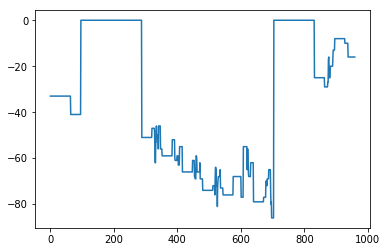

In [62]:
plt.plot(xPos)

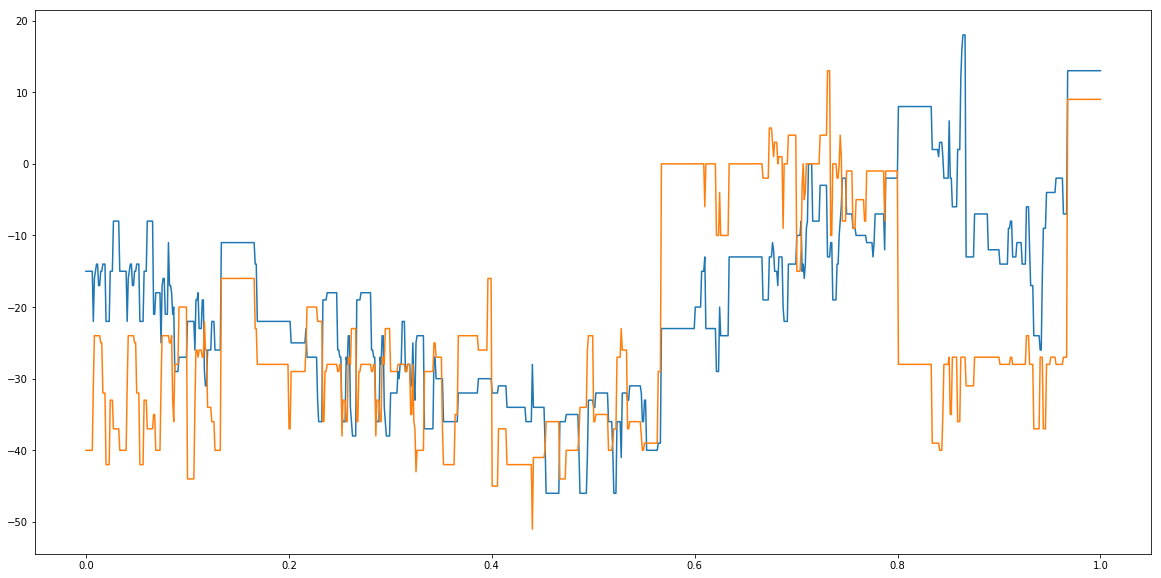

In [116]:
plt.figure(figsize=(20,10))
fileNo=2500
x=AOdataframe['xPos'][fileNo]
y=AOdataframe['yPos'][fileNo]
timeaxis=AOdataframe['time'][fileNo]
plt.plot(timeaxis,x)
plt.plot(timeaxis,y)